<a href="https://colab.research.google.com/github/a-kanaan/generative-ai/blob/master/embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

this work has been inspired by: Jay https://jalammar.github.io/illustrated-word2vec/

created by: Abdulkarim Kanaan

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

# 🧠 Personality Embeddings: Representing Traits as Vectors

In [2]:
# Define personality embeddings for individuals
# Traits: [Introversion, Openness, Conscientiousness]
personality_vectors = {
    'Alice': np.array([0.8, 0.6, 0.7]),
    'Bob': np.array([0.2, 0.9, 0.4]),
    'Cara': np.array([0.9, 0.4, 0.8])
}

In [3]:
# Compute cosine similarities
def compute_cosine_similarity(vec1, vec2):
    return cosine_similarity([vec1], [vec2])[0][0]

In [4]:
# Display similarities
for person1 in personality_vectors:
    for person2 in personality_vectors:
        if person1 != person2:
            sim = compute_cosine_similarity(personality_vectors[person1], personality_vectors[person2])
            print(f"Cosine similarity between {person1} and {person2}: {sim:.2f}")

Cosine similarity between Alice and Bob: 0.80
Cosine similarity between Alice and Cara: 0.98
Cosine similarity between Bob and Alice: 0.80
Cosine similarity between Bob and Cara: 0.67
Cosine similarity between Cara and Alice: 0.98
Cosine similarity between Cara and Bob: 0.67


 # 📝 Word Embeddings: Capturing Semantic Relationships

## 🧠 Step 1: Load Pre-trained GloVe Embeddings

In [16]:
import gensim.downloader as api

# Load the GloVe model (100-dimensional vectors)
glove_model = api.load("glove-wiki-gigaword-50")


[==================================================] 100.0% 66.0/66.0MB downloaded


## 🔍 Step 2: Retrieve Word Vectors

In [17]:
import numpy as np

# Define the words
words = ['king', 'queen', 'man', 'woman']

# Retrieve their vectors
vectors = np.array([glove_model[word] for word in words])


In [18]:
glove_model['king']

array([ 0.50451 ,  0.68607 , -0.59517 , -0.022801,  0.60046 , -0.13498 ,
       -0.08813 ,  0.47377 , -0.61798 , -0.31012 , -0.076666,  1.493   ,
       -0.034189, -0.98173 ,  0.68229 ,  0.81722 , -0.51874 , -0.31503 ,
       -0.55809 ,  0.66421 ,  0.1961  , -0.13495 , -0.11476 , -0.30344 ,
        0.41177 , -2.223   , -1.0756  , -1.0783  , -0.34354 ,  0.33505 ,
        1.9927  , -0.04234 , -0.64319 ,  0.71125 ,  0.49159 ,  0.16754 ,
        0.34344 , -0.25663 , -0.8523  ,  0.1661  ,  0.40102 ,  1.1685  ,
       -1.0137  , -0.21585 , -0.15155 ,  0.78321 , -0.91241 , -1.6106  ,
       -0.64426 , -0.51042 ], dtype=float32)

## 📏 Step 3: Compute Cosine Similarities

In [19]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute cosine similarity matrix
cos_sim_matrix = cosine_similarity(vectors)

# Display the similarity matrix
import pandas as pd

similarity_df = pd.DataFrame(cos_sim_matrix, index=words, columns=words)
print(similarity_df)


           king     queen       man     woman
king   1.000000  0.783904  0.530938  0.411338
queen  0.783904  1.000000  0.536670  0.600311
man    0.530938  0.536670  1.000000  0.886034
woman  0.411338  0.600311  0.886034  1.000000


 ## 📊 Step 4: Visualize Word Embeddings

In [32]:
import spacy
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


<Figure size 64x48 with 0 Axes>

In [133]:
def plot_heatmap(words_subset, embedding_dict, figsize=(14, 6)):
  # Count number of words (used to create subplots)
  n_words = len(words_subset)

  # Create one subplot per word (n_words rows, 1 column), and set overall figure size
  fig, axes = plt.subplots(n_words, 1, figsize=figsize)

  # Loop over each subplot axis and word
  for ax, word in zip(axes, words_subset):
      vec = embedding_dict[word]  # Get the 50-dim vector for the word

      # Plot the word's embedding as a 1-row heatmap
      sns.heatmap(vec[np.newaxis, :],  # Make it 2D for heatmap
                  ax=ax,               # Current subplot
                  cmap="coolwarm",     # Red-to-blue color scheme
                  cbar=True,           # Show color bar
                  xticklabels=False,   # Hide x-axis labels (dim numbers)
                  yticklabels=[f'"{word}"'],  # Show word label on y-axis
                  annot=False,         # Do not annotate cell values
                  linewidths=0.1)      # Thin lines between cells for clarity

      # Customize y-axis label
      ax.set_yticklabels([f'"{word}"'], rotation=0, fontsize=12)

  # Adjust layout to prevent overlap
  plt.tight_layout(pad=0.1)

  # Fine-tune vertical spacing between subplots
  plt.subplots_adjust(hspace=0.01)

  # Display the figure
  plt.show()

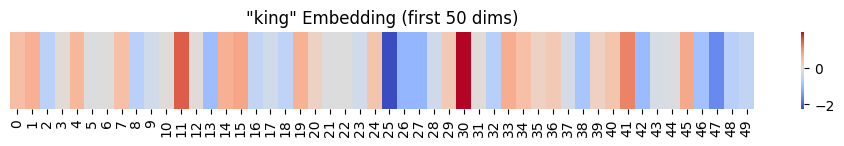

In [37]:
vec = glove_model['king']

plt.figure(figsize=(12, 1))
sns.heatmap(vec[np.newaxis, :], xticklabels=True, annot=False, cmap="coolwarm", cbar=True)
plt.title('"king" Embedding (first 50 dims)')
plt.yticks([])

plt.show()

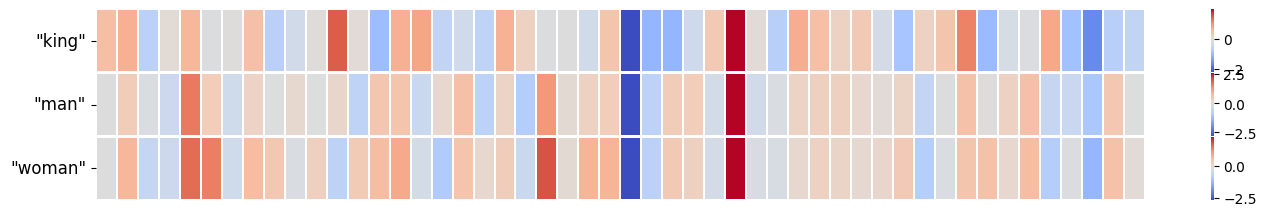

In [135]:
# Select three words
words_subset = ["king", "man", "woman"]
embedding_dict = {word: glove_model[word][:50] for word in words_subset}

plot_heatmap(words_subset, embedding_dict, figsize=(14, 2))


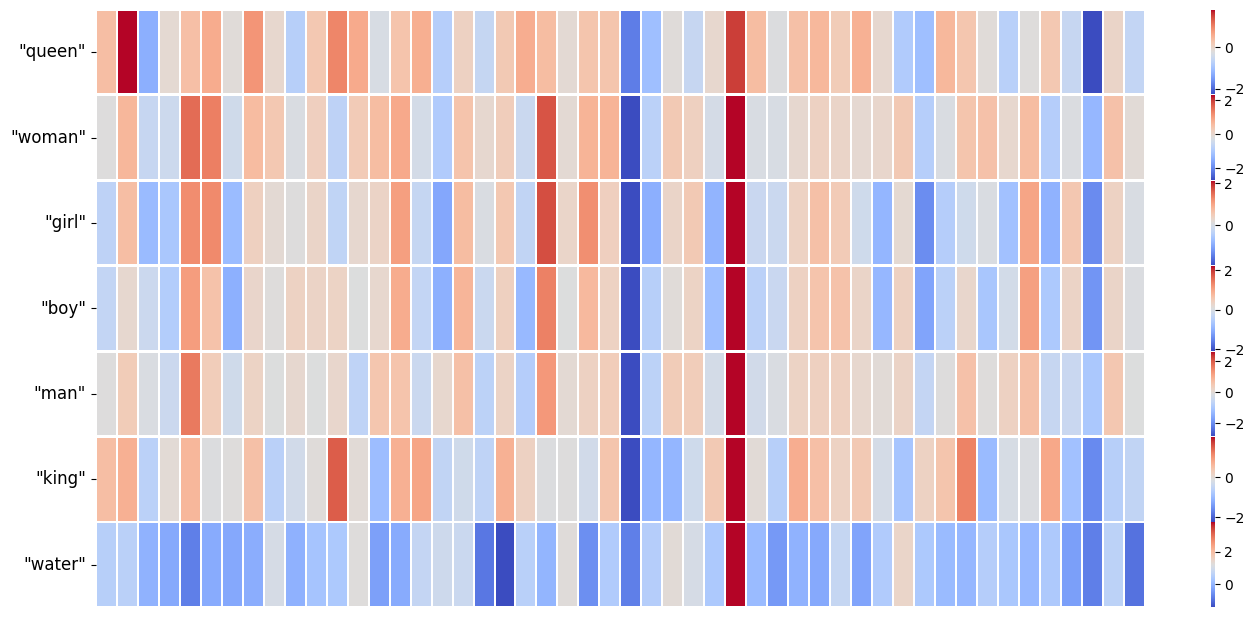

In [136]:
# Define a subset of words to visualize
words_subset = ["queen", "woman", "girl", "boy", "man", "king", "water"]

# Create a dictionary with the first 50 dimensions of each word's embedding
embedding_dict = {word: glove_model[word][:50] for word in words_subset}

plot_heatmap(words_subset, embedding_dict, figsize=(14, 6))

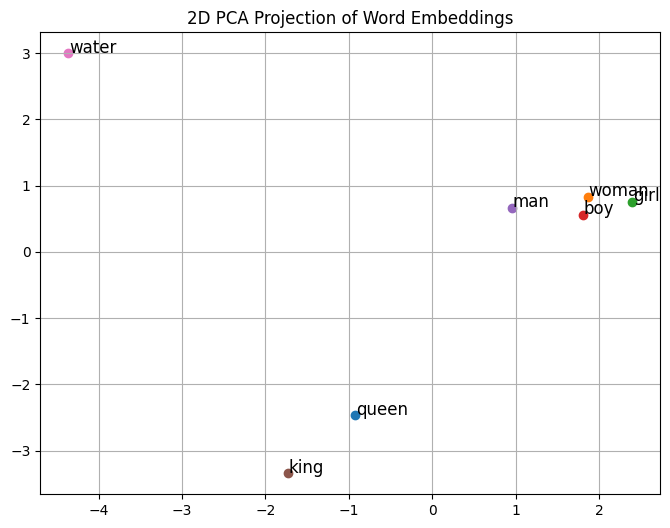

## 🧠 Step 5: Explore Word Analogies

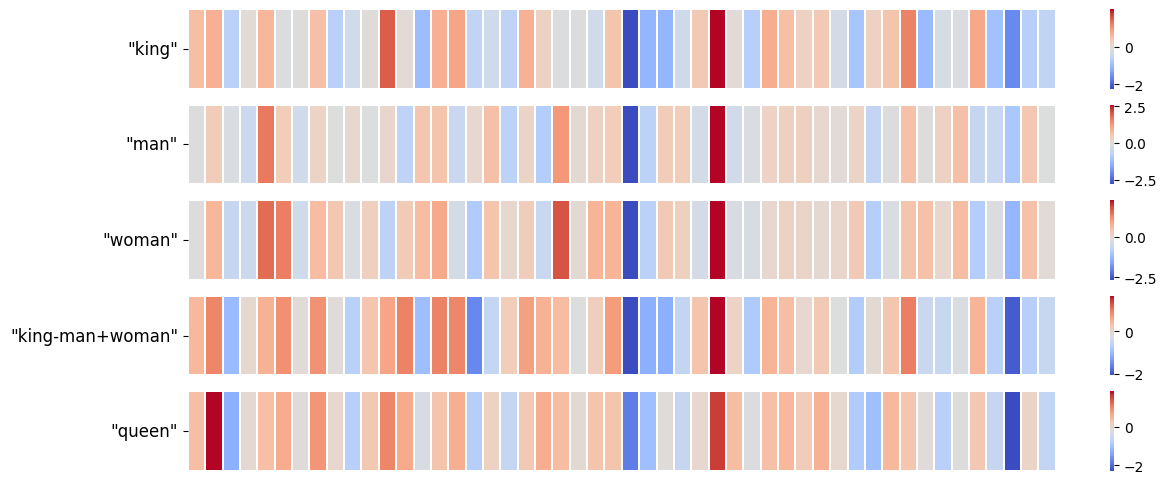

In [132]:


# Compute the analogy vector
king = glove_model['king']
man = glove_model['man']
woman = glove_model['woman']
queen = glove_model['queen']
analogy_vector = king - man + woman

embedding_dict = {
    'king': king,
    'man' : man,
    'woman': woman,
    "king-man+woman": analogy_vector,
    "queen": queen
}

# Define a subset of words to visualize
words_subset = list(embedding_dict.keys())

plot_heatmap(words_subset, embedding_dict, figsize=(14, 6))

In [ ]:
# Find the most similar words to the analogy vector
similar_words = glove_model.similar_by_vector(analogy_vector, topn=5)
print("Words similar to 'king' - 'man' + 'woman':")
for word, similarity in similar_words:
    print(f"{word}: {similarity:.4f}")

In [149]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce dimensions to 2D
pca = PCA(n_components=2)



In [152]:
# Define the words
words = ['king', 'girl', 'boy', 'queen', 'man', 'woman', 'water']
#words = ['cats', 'dog', 'puppy', 'building', 'houses', 'apple', 'banana', 'adult', 'baby']

# Retrieve their vectors
vectors = np.array([glove_model[word] for word in words])
reduced_vectors = pca.fit_transform(vectors)

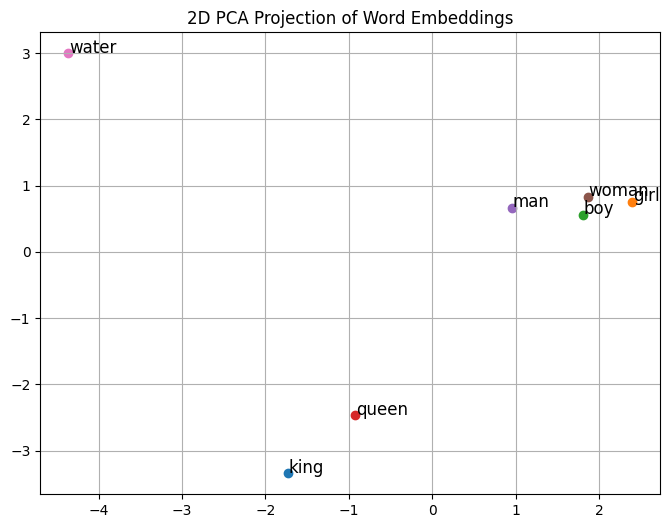

In [153]:
# Plot the words
plt.figure(figsize=(8, 6))
for i, word in enumerate(words):
    x, y = reduced_vectors[i]
    plt.scatter(x, y)
    plt.text(x + 0.01, y + 0.01, word, fontsize=12)
plt.title("2D PCA Projection of Word Embeddings")
plt.grid(True)
plt.show()